# Model Training
1.1 Import Data and Required Packages
Import Pandas, Numpy, Matplotlib, Seaborn and Warings LIbrary.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('Data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


__Preparing X and Y Variable__

In [4]:
X = df.drop(columns=['math_score'], axis=1)

In [5]:
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [6]:
print("Categories in 'gender' varible: ", end=" ")
print(df['gender'].unique())

print("Categories in 'Race Ethnicity' varible: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'Parental Level of Education' varible: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'Lunch' varible: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'Test Preparation Course' varible: ", end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' varible:  ['female' 'male']
Categories in 'Race Ethnicity' varible:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental Level of Education' varible:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' varible:  ['standard' 'free/reduced']
Categories in 'Test Preparation Course' varible:  ['none' 'completed']


In [7]:
y = df['math_score']

In [8]:
y.head(2)

0    72
1    69
Name: math_score, dtype: int64

In [9]:
# create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

__Create and Evaluation function to give all metrics after model Training__

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2score = r2_score(true, predicted)
    return mae,mse, rmse, r2score

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost REgressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

In [23]:
# for i in range(len(list(models))):
#     model = list(models.values())[i]
#     model.fit(X_train, y_train) # Train Model

#     # Make Predictions
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)

#     # Evaluate Train and Test Dataset
#     model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

#     model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


#     print(list(models.keys())[i])
#     model_list.append(list(models.keys())[i])

#     print("Model performance for Training set")
#     print(" - Root Mean Sqared Error: {:.4f}".format(model_test_rmse))
#     print(" - Mean Abosolute Error: {:.4f}".format(model_test_mae))
#     print("- R2 Score: {:.4f}".format(model_test_r2))
#     r2_list.append(model_test_r2)

#     print('-'*35)
#     print('\n')

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae,model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae,model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- Mean Squared Error: 28.3349
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- Mean Squared Error: 29.0952
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- Mean Squared Error: 43.4784
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- Mean Squared Error: 42.5064
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- Mean Squared Error: 28.3378
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- Mean Squared Error: 29.0563
- R2

## Results

In [24]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852807
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.849100
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783722
4,Decision Tree,0.741964


## Linear Regression

In [25]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

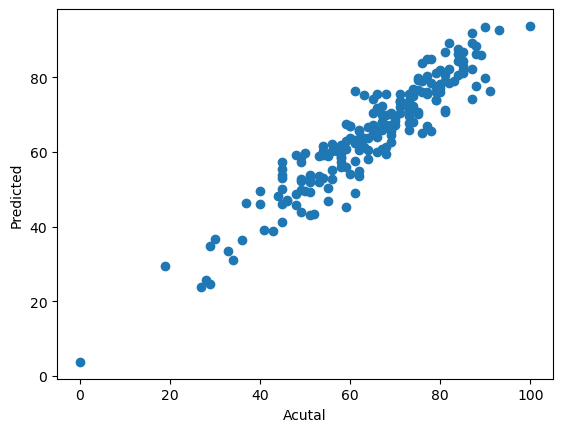

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Acutal")
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

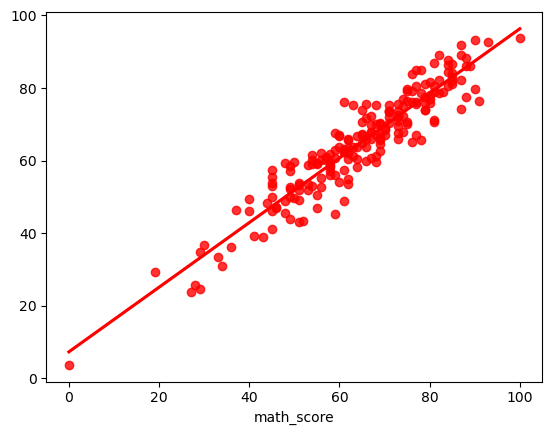

In [27]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

#### Difference between actual and predicted values

In [29]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
pred_df

,Actual Value,Predicted Value
521,91,76.387970
737,53,58.885970
740,80,76.990265
660,74,76.851804
411,84,87.627378
...,...,...
408,52,43.409149
332,62,62.152214
208,74,67.888395
613,65,67.022287
